In [87]:
import copy

# Import libraries and modules
import numpy as np
import os
import pandas as pd
from datetime import datetime

import tarfile
import urllib

import warnings
warnings.filterwarnings('ignore')

In [88]:
# Dataset directory
dataset_master_dir = "D:\\KIGAM_Hackathon\\Dataset\\3w_dataset-master\\data\\data.7z\\data"
os.chdir(dataset_master_dir)

dir_list = os.listdir(dataset_master_dir) # ['0', '1', '2', '3', '4', '5', '6', '7', '8']

In [89]:
# About 11 min passed to execute.
# df_all_data_list = []
df_avg_list = pd.DataFrame(columns=['class', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL'])

def load_data(filename: str):
    csv_path = filename
    date_parser_ = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.000000")
    return pd.read_csv(csv_path, sep=",", parse_dates=['timestamp'], date_parser=date_parser_)

# for problem in dir_list[0]: # For only normal operation dataset (Debugging)
for problem in dir_list: # For all dataset
    os.chdir(os.path.join(dataset_master_dir, problem))
    filelist = os.listdir()
    for file in filelist:
        data = load_data(file)
        column = data.columns
        avg_data = pd.DataFrame(columns=column[1:9])
        avg_data.insert(0, 'class', 'NaN')
        avg_data.loc[len(avg_data), 'class'] = problem
        for type in column[1:9]:
            # Replace NaN value to Average of each variable
            data.fillna(data.mean())
            avg_data[type] = data[type].mean()
        df_avg_list = pd.concat([df_avg_list, avg_data])
        # df_all_data_list.append(data)

In [112]:
pd.options.display.max_rows = 4000
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
print(df_avg_list)
len(df_avg_list)

  class         P-PDG         P-TPT       T-TPT     P-MON-CKP   T-JUS-CKP    P-JUS-CKGL T-JUS-CKGL       QGL
0     0  0.000000e+00  1.005535e+07  119.032772  1.579691e+06   84.236402  1.565949e+06        NaN  0.000000
0     0  0.000000e+00  1.001934e+07  119.033867  1.575567e+06   84.148449  1.569573e+06        NaN  0.000000
0     0  0.000000e+00  9.996878e+06  118.973738  1.568945e+06   84.105403  1.573106e+06        NaN  0.000000
0     0  0.000000e+00  9.941311e+06  118.848307  1.566692e+06   83.989519  1.574739e+06        NaN  0.000000
0     0  0.000000e+00  9.907400e+06  118.766105  1.563509e+06   83.785720  1.576304e+06        NaN  0.000000
0     0  0.000000e+00  9.895540e+06  118.785804  1.554504e+06   83.746581  1.579732e+06        NaN  0.000000
0     0  0.000000e+00  9.894623e+06  118.793411  1.554993e+06   83.789316  1.571265e+06        NaN  0.000000
0     0  0.000000e+00  1.384579e+07  117.669380  5.792548e+06   70.318755  3.365231e+06        NaN  0.000000
0     0  0.000000e+

1984

Error in callback <function _draw_all_if_interactive at 0x0000015E9B35E200> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

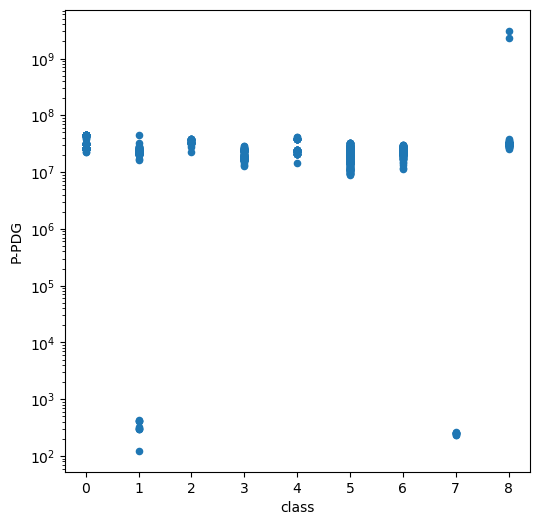

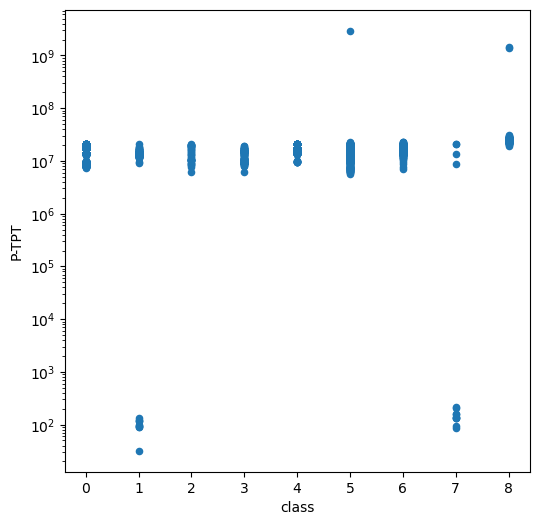

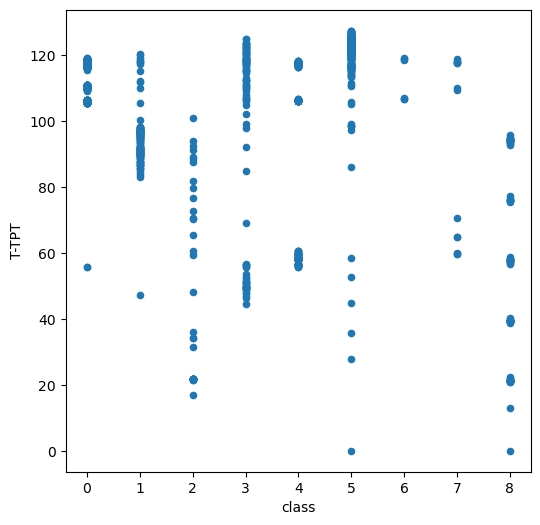

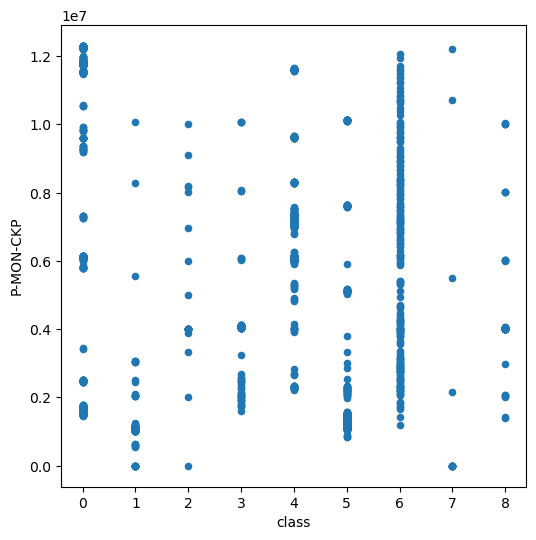

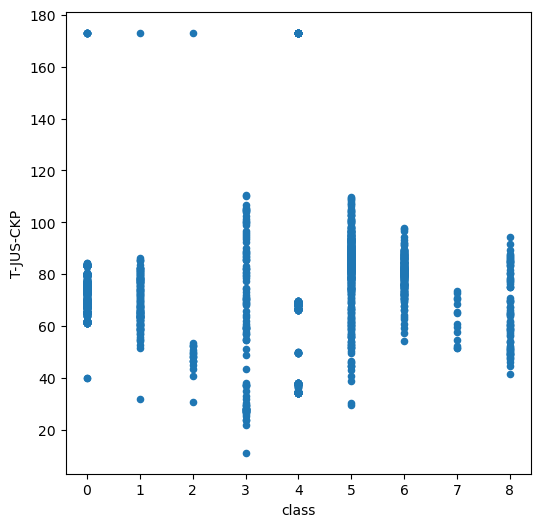

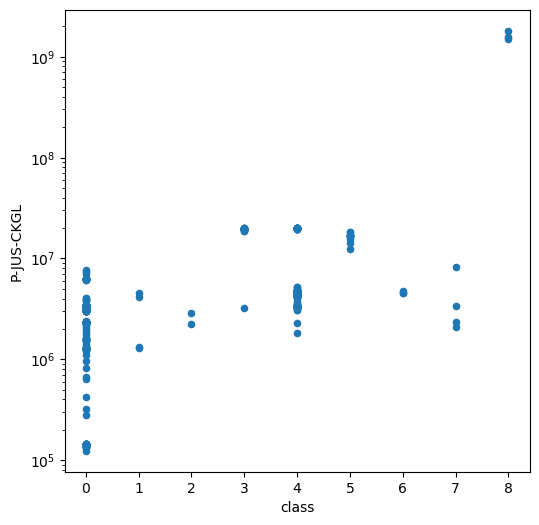

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 600x600 with 1 Axes>

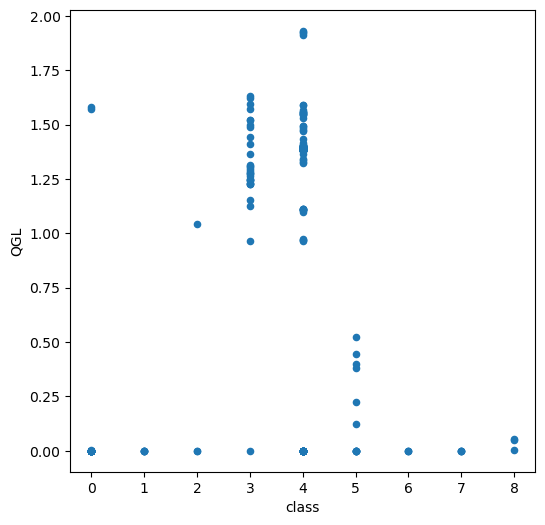

In [143]:
import matplotlib.pyplot as plt

# For dealing with minus value
import copy
df_avg_list_copy = copy.deepcopy(df_avg_list)

for idx in range(len(df_avg_list_copy)):
    for col in range(1,9):
        if df_avg_list_copy.iloc[idx, col] < 0.0:
            df_avg_list_copy.iloc[idx, col] = 0.0

import matplotlib

fig_size = (6, 6)

fig_P_PDG = df_avg_list_copy.plot.scatter(x='class', y='P-PDG', figsize = fig_size)
# plt.title("P-PDG")
ax = plt.gca()
ax.set_yscale('log')

fig_P_TPT = df_avg_list_copy.plot.scatter(x='class', y='P-TPT', figsize = fig_size)
# plt.title("P-TPT")
ax = plt.gca()
ax.set_yscale('log')

fig_T_TPT = df_avg_list_copy.plot.scatter(x='class', y='T-TPT', figsize = fig_size)
# plt.title("T-TPT")

fig_P_MON_CKP = df_avg_list_copy.plot.scatter(x='class', y='P-MON-CKP', figsize = fig_size)
# plt.title("P-MON-CKP")

fig_T_JUS_CKP = df_avg_list_copy.plot.scatter(x='class', y='T-JUS-CKP', figsize = fig_size)
# plt.title("T-JUS-CKP")

fig_P_JUS_CKGL = df_avg_list_copy.plot.scatter(x='class', y='P-JUS-CKGL', figsize = fig_size)
# plt.title("P-JUS-CKGL")
ax = plt.gca()
ax.set_yscale('log')

fig_T_JUS_CKGL = df_avg_list_copy.plot.scatter(x='class', y='T-JUS-CKGL', figsize = fig_size)
# plt.title("T-JUS-CKGL")

fig_QGL = df_avg_list_copy.plot.scatter(x='class', y='QGL', figsize = fig_size)
# plt.title("QGL")

In [93]:
import pickle

with open('avg_data.pkl', 'wb') as pkl:
    pickle.dump(df_avg_list, pkl)

In [138]:
from copy import deepcopy
df_avg_list_copy2 = deepcopy(df_avg_list)

for idx in range(len(df_avg_list_copy2)):
    for col in range(1,9):
        if df_avg_list_copy2.iloc[idx, col] < 0.0:
            df_avg_list_copy2.iloc[idx, col] = 0.0

# df_avg_list_copy2 = deepcopy(df_avg_list)
# # df_avg_list.iloc[721]
# if df_avg_list_copy2.iloc[721, 6] < 0.0:
#     df_avg_list_copy2.iloc[721, 6] = [0.0]
#
df_avg_list_copy2.iloc[1898]

class                       7
P-PDG                     0.0
P-TPT         21202174.914796
T-TPT              117.496581
P-MON-CKP     12196469.418904
T-JUS-CKP           65.445629
P-JUS-CKGL     2362012.196418
T-JUS-CKGL                NaN
QGL                       0.0
Name: 0, dtype: object